<a href="https://colab.research.google.com/github/fabiodemo/Deep-Learning-CV-CNN-TL/blob/main/cnn_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks - Implementation

Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`tf.keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`tf.keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`tf.keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.




### 1. Preparing the input data

In [50]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from tensorflow.keras.datasets import mnist

In [52]:
mnist.load_data?

In [53]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [54]:
X_train.shape

(60000, 28, 28)

In [55]:
X_test.shape

(10000, 28, 28)

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [57]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

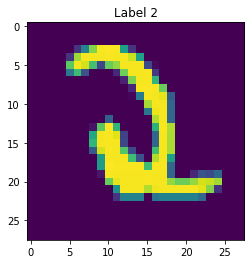

In [58]:
import matplotlib.pyplot as plt

i=400
plt.imshow(X_train[i])
plt.title("Label " + str(y_train[i]))
plt.show()

Now, let's normalize the data using standardization:

In [59]:
X_train/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [61]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(400, activation='relu'),
    Dense(10, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               314000    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

epochs são os números de vezes que a rede neural vai ler por completo todos os dados

In [64]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7743 - accuracy: 0.8999 - val_loss: 0.4724 - val_accuracy: 0.9148
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3267 - accuracy: 0.9336 - val_loss: 0.2933 - val_accuracy: 0.9366
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2766 - accuracy: 0.9405 - val_loss: 0.3083 - val_accuracy: 0.9403


In [65]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9438 - val_loss: 0.3260 - val_accuracy: 0.9368
Epoch 2/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2368 - accuracy: 0.9482 - val_loss: 0.3126 - val_accuracy: 0.9417
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2154 - accuracy: 0.9525 - val_loss: 0.3073 - val_accuracy: 0.9456
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1982 - accuracy: 0.9560 - val_loss: 0.2819 - val_accuracy: 0.9457
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2101 - accuracy: 0.9549 - val_loss: 0.3186 - val_accuracy: 0.9405
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1926 - accuracy: 0.9588 - val_loss: 0.3272 - val_accuracy: 0.9477


In [66]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1823 - accuracy: 0.9619 - val_loss: 0.3655 - val_accuracy: 0.9434
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1814 - accuracy: 0.9615 - val_loss: 0.3458 - val_accuracy: 0.9497
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1731 - accuracy: 0.9635 - val_loss: 0.3650 - val_accuracy: 0.9487
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1727 - accuracy: 0.9650 - val_loss: 0.3391 - val_accuracy: 0.9516
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1781 - accuracy: 0.9638 - val_loss: 0.4348 - val_accuracy: 0.9513
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1731 - accuracy: 0.9661 - val_loss: 0.3804 - val_accuracy: 0.9480
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1620 - accuracy: 0.9668 - val_loss: 0.4345 - val_accuracy:

In [67]:
import pandas as pd
# hist.history
# pd.DataFrame(hist.history)
df = pd.DataFrame(hist.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.182315,0.961867,0.365515,0.9434
1,0.181409,0.961467,0.345836,0.9497
2,0.173127,0.963550,0.364990,0.9487
3,0.172723,0.965017,0.339089,0.9516
4,0.178067,0.963833,0.434832,0.9513
5,0.173054,0.966083,0.380440,0.9480
6,0.161971,0.966833,0.434549,0.9489
7,0.160104,0.968533,0.466900,0.9536
8,0.155578,0.969550,0.478246,0.9514
9,0.146980,0.970433,0.504623,0.9549


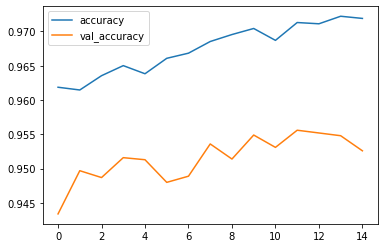

In [68]:
df[['accuracy', 'val_accuracy']].plot()

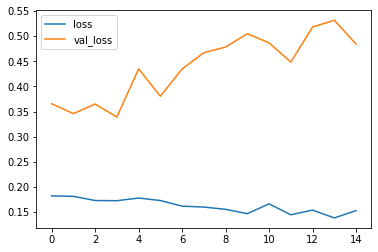

In [69]:
df[['loss', 'val_loss']].plot()

##### Os dados foram treinados sem normalizar os dados, então para verificar a diferença utilizaremos os dataset com dados normalizados

In [70]:
x_mean = X_train.mean()
x_std = X_train.std()
X_train_norm = (X_train - x_mean)/ x_std

In [71]:
X_test_norm = (X_test-x_mean)/x_std

In [72]:
hist = model.fit(X_train_norm, 
                 y_train, 
                 validation_data=(X_test_norm, y_test), 
                 epochs=15
                 )

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1279 - accuracy: 0.9615 - val_loss: 0.0962 - val_accuracy: 0.9716
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0798 - val_accuracy: 0.9762
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.1008 - val_accuracy: 0.9750
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0855 - val_accuracy: 0.9789
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0875 - val_accuracy:

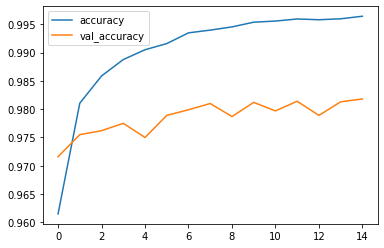

In [73]:
df = pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

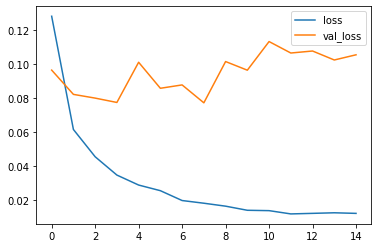

In [74]:
df[['loss', 'val_loss']].plot()

### 3. Extending to CNNs


Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units


#### 3.1 CNN - First Intuitions

In [75]:
from tensorflow.keras.layers import Conv2D

In [76]:
conv = Conv2D(1, kernel_size=(3, 3))

In [77]:
conv.weights

[]

In [78]:
x = X_train_norm[0].reshape(1, 28, 28, 1)

In [79]:
new_x = conv(x)

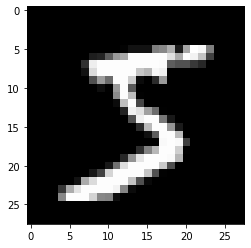

In [80]:
plt.imshow(X_train_norm[0], cmap='gray')

In [81]:
new_x.shape

TensorShape([1, 26, 26, 1])

In [82]:
new_x = new_x.numpy().reshape(26, 26)

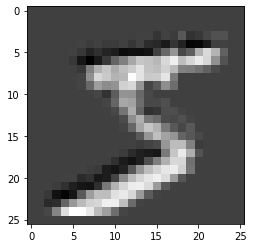

In [84]:
plt.imshow(new_x, cmap='gray')


#### 3.2 One Conv-Layer + Maxpooling

In [85]:
from tensorflow.keras.layers import Conv2D

In [97]:
model = Sequential([Conv2D(6, 
                           kernel_size=(3,3), 
                           input_shape=(28, 28, 1)),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 flatten_3 (Flatten)         (None, 4056)              0         
                                                                 
 dense_5 (Dense)             (None, 120)               486840    
                                                                 
 dense_6 (Dense)             (None, 100)               12100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 500,010
Trainable params: 500,010
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [100]:
X_train_norm = X_train_norm.reshape(60000, 28, 28, 1)
X_test_norm = X_test_norm.reshape(-1, 28, 28, 1)

In [102]:
hist = model.fit(X_train_norm, 
          y_train,  
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9837 - val_loss: 0.0858 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.1003 - val_accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.1175 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0964 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.1276 - val_accuracy: 0.9713


#### 3.3 Two Conv-Layer + Maxpooling

And now, let's finish the architecture:

In [108]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D

model = Sequential([Conv2D(6, 
                           kernel_size=(3,3), 
                           input_shape=(28, 28, 1),
                           activation='relu'),
                    MaxPool2D(),
                    Conv2D(16, 
                           kernel_size=(3,3),
                           activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

In [110]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [111]:
hist = model.fit(X_train_norm, 
          y_train,  
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1727 - accuracy: 0.9465 - val_loss: 0.0859 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0622 - accuracy: 0.9802 - val_loss: 0.0533 - val_accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.0634 - val_accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0385 - val_accuracy: 0.9880


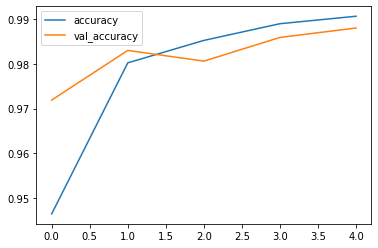

In [112]:
df = pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

In [114]:
model.save('best_model.h5')
# Para carregar, só usar a função load_model do Keras

### 4. Visualizing predictions

Finally, let's visualize some predictions:

In [118]:
x = X_test_norm[0].reshape(1, 28, 28, 1)
model.predict(x)

array([[4.4350596e-08, 2.0265409e-06, 1.4663436e-05, 4.9224868e-06,
        3.8383228e-06, 5.9365082e-08, 1.9767414e-10, 9.9984848e-01,
        6.1434656e-07, 1.2526111e-04]], dtype=float32)

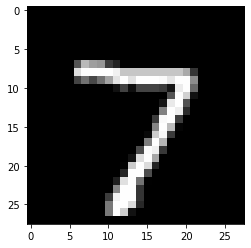

In [129]:
plt.imshow(x.reshape(28, 28), cmap='gray')

In [119]:
y_test[0]

7

In [121]:
pred = model.predict(x)

In [124]:
idx = pred.argmax()
idx

7

In [126]:
pred[0][idx]

0.9998485

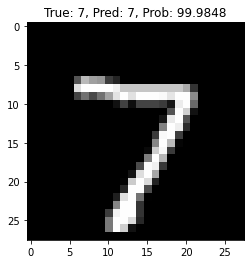

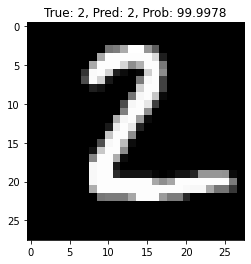

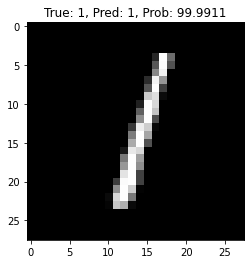

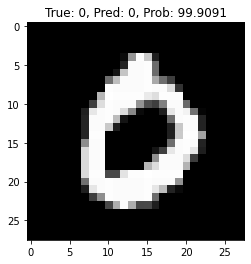

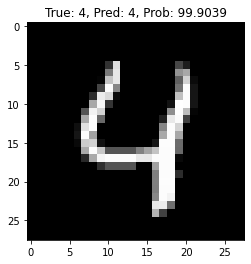

In [133]:
for id in range(5):
  x = X_test_norm[id].reshape(1, 28, 28, 1)
  plt.imshow(x.reshape(28, 28), cmap='gray')
  pred = model.predict(x)
  pred_class = pred.argmax()
  plt.title(f'True: {y_test[id]}, Pred: {pred_class}, Prob: {pred[0][pred_class]*100:.4 f}')
  plt.show()

### 5. Visualizing Conv Filters

In [137]:
conv_layer = model.layers[0]
conv_layer.weights # 6 filtros, saída serão 6 imagens

[<tf.Variable 'conv2d_9/kernel:0' shape=(3, 3, 1, 6) dtype=float32, numpy=
 array([[[[-0.10020842,  0.39807978, -0.08498003, -0.30788735,
            0.34329394,  0.05277038]],
 
         [[-0.27782416, -0.18209599,  0.12219884, -0.17595348,
            0.4780755 ,  0.35700783]],
 
         [[ 0.25573045, -0.26916683,  0.15958695,  0.01387115,
           -0.08797214,  0.1633166 ]]],
 
 
        [[[-0.01831366, -0.12138516,  0.31045622, -0.44269085,
           -0.4163174 , -0.19914095]],
 
         [[-0.2968359 ,  0.00856949,  0.04213435,  0.19198243,
           -0.36934957,  0.3564877 ]],
 
         [[ 0.23928043, -0.26433754,  0.3150922 ,  0.2447632 ,
           -0.2231054 ,  0.06069497]]],
 
 
        [[[-0.23559938,  0.3739307 ,  0.30932406, -0.43154883,
           -0.19440836, -0.49912202]],
 
         [[ 0.06432759, -0.0779438 ,  0.21512693, -0.0722214 ,
           -0.21244392,  0.00948703]],
 
         [[ 0.37225935, -0.34677234, -0.15191106,  0.28856987,
           -0.06443514, 

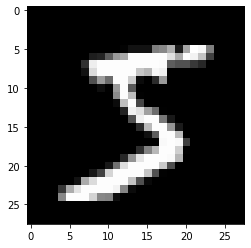

In [146]:
x = X_train_norm[0].reshape(1, 28, 28, 1)
plt.imshow(x.reshape(28, 28), cmap='gray')

In [149]:
output_imgs = conv_layer(x)
output_imgs

<tf.Tensor: shape=(1, 26, 26, 6), dtype=float32, numpy=
array([[[[0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         ...,
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ]],

        [[0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
          0.        ],
         ...,
         [0.        , 0.1808088 , 0.        , 0.1736829 , 0.44372267,
       

In [148]:
id = 0
output_imgs[:, :, :, id].shape

TensorShape([1, 26, 26])

In [157]:
id = 0
img = output_imgs[:, :, :, id].numpy().reshape(26, 26)
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

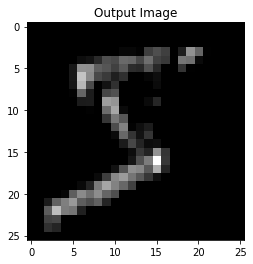

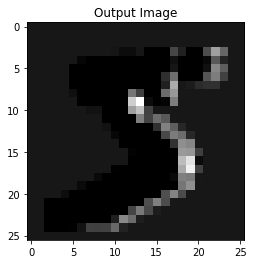

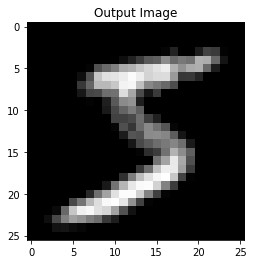

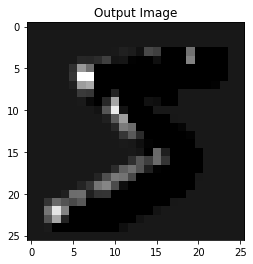

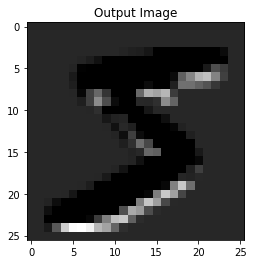

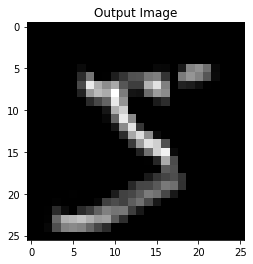

In [158]:
for id in range(6):
  img = output_img[:, :, :, id].numpy().reshape(26, 26)
  plt.imshow(img, cmap='gray')
  plt.title('Output Image')
  plt.show()